# Activity 2. Network Analysis Tutoriales

## Chapter 1

NetworkX can be used to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available.

### The `import` statement

In [1]:
import networkx as nx # Calling the NetworkX library with the alias nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nx.__version__

'3.3'

### Creating and drawing undirected graphs

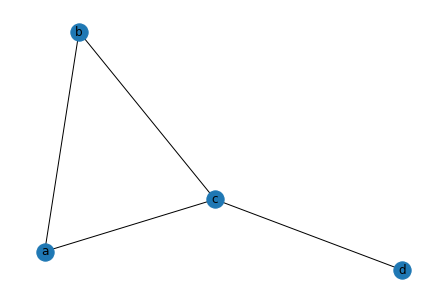

In [3]:
# d "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# add edges from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

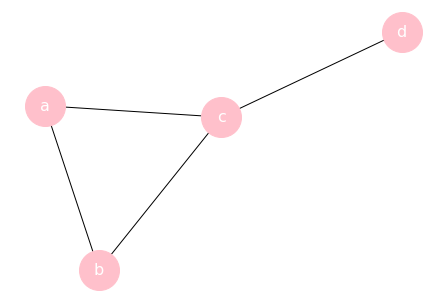

In [4]:
# there are many optional arguments to the draw function to customize the appearance
nx.draw(G,
       with_labels=True,
       node_color='pink',
       node_size=1600,
       font_color='white',
       font_size=16
       )

### Graph methods

In [5]:
# the graph object has some properties and methods giving data about the whole graph

# list all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [6]:
# list all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [7]:
# NodeView and EdgeView objects have iterators, so we can use them in `for` loops
for node in G.nodes:
    print(node)

a
b
c
d


In [8]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [9]:
# we can get the number of nodes and edges in a graph using the `number_of_` methods
G.number_of_nodes()

4

In [10]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [11]:
# list of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [12]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


and you can always use the list constructor to make a `list` from an iterator:

In [13]:
list(G.neighbors('b'))

['a', 'c']

### NetworkX functions vs. Graph methods

The previous data are available via graph methods, i.e. they are called from the graph object:

`G.<method_name>(<arguments>)`

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

`nx.<function_name>(G, <arguments>)`

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [14]:
nx.is_tree(G)

False

In [15]:
nx.is_connected(G)

True

### Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:

In [16]:
G.has_node('a')

True

In [17]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [18]:
'd' in G.nodes

True

Likewise we can check if two nodes are connected by an edge:

In [19]:
G.has_edge('a', 'b')

True

In [20]:
G.has_edge('a', 'd')

False

In [21]:
('c', 'd') in G.edges

True

### Node degree
One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [22]:
len(list(G.neighbors('a')))

2

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [23]:
G.degree('a')

2

### EXERCISE 1
Often in the context of trees, a node with degree 1 is called a leaf. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [24]:
def get_leaves(G):
    # empty list to store leaf nodes
    leaves = []
    
    # iterate over each node in the graph
    for node in G.nodes:
        # check if the node is a leaf node
        if G.degree(node) == 1:
            # if it's a leaf node, add to the list of leaves
            leaves.append(node)
            
    # return the list containing all the leaf nodes in the graph
    return leaves

In [25]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

set(get_leaves(G)) == {'c', 'b'}

True

### Aside: comprehensions

Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first. List comprehensions and generator expressions are compact ways to do this.

List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [26]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In the context of NetworkX, this is often used to do something with the node or edge lists:

In [27]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'd', 'c']
[2, 1, 2, 1]


Generator expressions are slightly different as they are evaluated lazily. These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the `max` function:

In [28]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [29]:
max(len(item) for item in items)

6

In [30]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

### Node names
The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

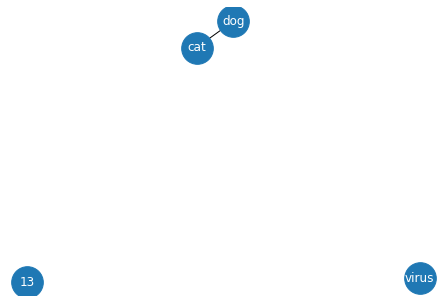

In [31]:

G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

### Adjacency lists
One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:

`a d e
b c
c
d
e`

the edges are as follows:

`(a, d)
(a, e)
(b, c)`

The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In [32]:
print(open(r'C:\Users\Julia\Desktop\Activity 2_Juliana Ramayo\friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [33]:
SG = nx.read_adjlist(r'C:\Users\Julia\Desktop\Activity 2_Juliana Ramayo\friends.adjlist')

We know how to draw this graph:

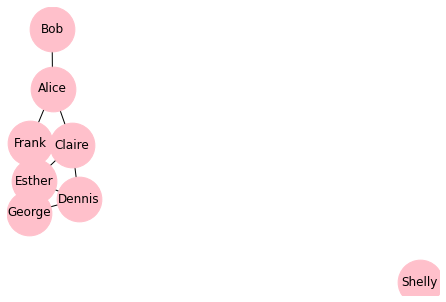

In [34]:
nx.draw(SG, node_size=2000, node_color='pink', with_labels=True)

And we know how to get information such as the number of friends linked from a node:

In [35]:
SG.degree('Alice')

3

### EXERCISE 2
Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [36]:
def max_degree(G):
    # dictionary that retrieves all node degrees in the graph
    node_degrees = {node: G.degree(node) for node in G.nodes()}
    
    # find the node with the maximum degree
    max_node = max(node_degrees, key=node_degrees.get)
    
    # return the node with the maximum degree and its degree
    return (max_node, node_degrees[max_node])

In [37]:
SG = nx.read_adjlist(r'C:\Users\Julia\Desktop\Activity 2_Juliana Ramayo\friends.adjlist')
max_degree(SG) == ('Claire', 4)

True

### EXERCISE 3
Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

`mutual_friends(SG, 'Alice', 'Claire') == ['Frank']`

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.

In [38]:
def mutual_friends(G, node_1, node_2):
    neighbors_node_1 = set(G.neighbors(node_1))
    neighbors_node_2 = set(G.neighbors(node_2))
    
    mutual = neighbors_node_1 & neighbors_node_2
    
    return list(mutual)

In [39]:
SG = nx.read_adjlist(r'C:\Users\Julia\Desktop\Activity 2_Juliana Ramayo\friends.adjlist')
mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
mutual_friends(SG, 'George', 'Bob') == []
sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

True

### Directed graphs
Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

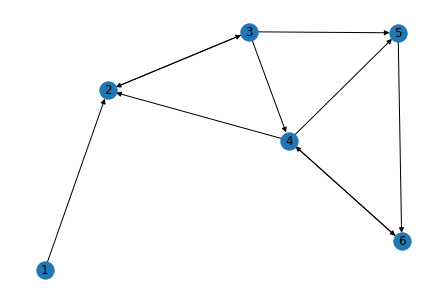

In [40]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [41]:
D.has_edge(1,2)

True

In [42]:
D.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [43]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [44]:
D.in_degree(2)

3

In [45]:
D.out_degree(2)

1

### Caveat
Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [46]:
D.degree(2)

4

In [47]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


## Chapter 2
### Paths
Let's start with a very simple, undirected network.

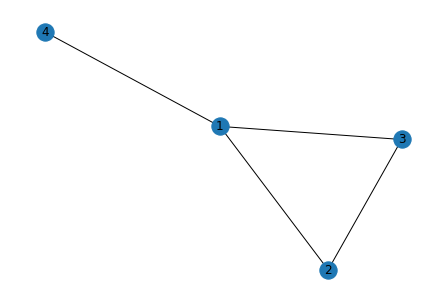

In [48]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

A path in a network is a sequence of edges connecting two nodes. In this simple example, we can easily see that there is indeed at least one path that connects nodes 3 and 4. We can verify this with NetworkX:

In [49]:
nx.has_path(G, 3, 4)

True

There can be more than one path between two nodes. Again considering nodes 3 and 4, there are two such "simple" paths:

In [50]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

A simple path is one without any cycles. If we allowed cycles, there would be infinitely many paths because one could always just go around the cycle as many times as desired.

We are often most interested in shortest paths. In an unweighted network, the shortest path is the one with the fewest edges. We can see that of the two simple paths between nodes 3 and 4, one is shorter than the other. We can get this shortest path with a single NetworkX function:

In [51]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

If you only care about the path length, there's a function for that too:

In [52]:
nx.shortest_path_length(G, 3, 4)

2

Note that a path length is defined here by the number of edges in the path, not the number of nodes, which implies

`nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1`

for nodes $u$ and $v$.

### Connected Components
In the simple network above, we can see that for every pair of nodes, we can find a path connecting them. This is the definition of a connected graph. We can check this property for a given graph:

In [53]:
nx.is_connected(G)

True

Not every graph is connected:

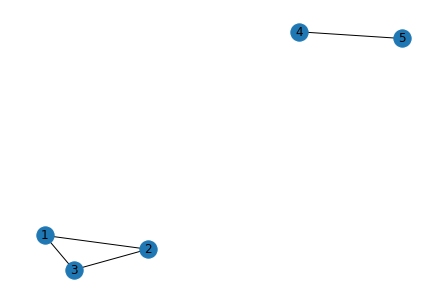

In [54]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [55]:
nx.is_connected(G)

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [56]:
nx.has_path(G, 3, 5)

False

In [57]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

Visually, we can identify two connected components in our graph. Let's verify this:

In [58]:
nx.number_connected_components(G)

2

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:

In [59]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In case you're not familiar with Python sets, they are collections of items without duplicates. These are useful for collecting node names because node names should be unique. As with other collections, we can get the number of items in a set with the `len` function:

In [60]:
components = list(nx.connected_components(G))
len(components[0])

3

We often care about the largest connected component, which is sometimes referred to as the core of the network. We can make use of Python's builtin `max` function in order to obtain the largest connected component. By default, Python's `max` function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass `len` as a key function:

In [61]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

While it's often enough to just have the list of node names, sometimes we need the actual subgraph consisting of the largest connected component. One way to get this is to pass the list of node names to the `G.subgraph()` function:

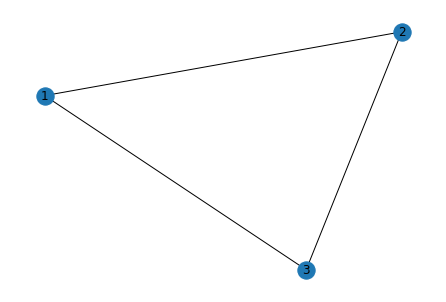

In [62]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

Those of you using tab-completion will also notice a `nx.connected_component_subgraphs()` function. This can also be used to get the core subgraph but the method shown is more efficient when you only care about the largest connected component.

### Directed Paths & Components
Let's extend these ideas about paths and connected components to directed graphs.

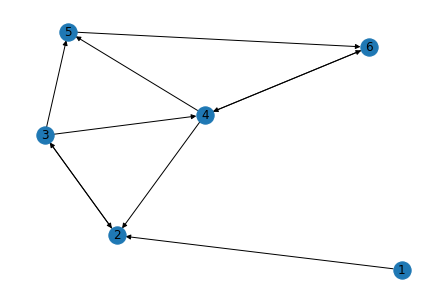

In [63]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

#### Directed Paths
We know that in a directed graph, an edge from an arbitrary node $u$ to an arbitrary node $v$ does not imply that an edge exists from $v$ to $u$. Since paths must follow edge direction in directed graphs, the same asymmetry applies for paths. Observe that this graph has a path from 1 to 4, but not in the reverse direction.

In [64]:
nx.has_path(D, 1, 4)

True

In [65]:
nx.has_path(D, 4, 1)

False

The other NetworkX functions dealing with paths take this asymmetry into account as well:

In [66]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [67]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

Since there is no edge from 5 to 3, the shortest path from 5 to 2 cannot simply backtrack the shortest path from 2 to 5 -- it has to go a longer route through nodes 6 and 4.

#### Directed Components
Directed networks have two kinds of connectivity. Strongly connected means that there exists a directed path between every pair of nodes, i.e., that from any node we can get to any other node while following edge directionality. Think of cars on a network of one-way streets: they can't drive against the flow of traffic.

In [68]:
nx.is_strongly_connected(D)

False

Weakly connected means that there exist a path between every pair of nodes, regardless of direction. Think about pedestrians on a network of one-way streets: they walk on the sidewalks so they don't care about the direction of traffic.

In [69]:
nx.is_weakly_connected(D)

True

If a network is strongly connected, it is also weakly connected. The converse is not always true, as seen in this example.

The `is_connected` function for undirected graphs will raise an error when given a directed graph.

In [70]:
# This will raise an error
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

In the directed case, instead of `nx.connected_components` we now have `nx.weakly_connected_components` and `nx.strongly_connected_components`:

In [71]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [72]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

### Dataset: US Air Traffic Network

In [73]:
G = nx.read_graphml(r"C:\Users\Julia\Desktop\Activity 2_Juliana Ramayo\openflights_usa.graphml.gz")

The nodes in this graph are airports, represented by their IATA codes; two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges

`[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]`

where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

In [74]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [75]:
G.nodes['IND']['name']

'Indianapolis International Airport'

#### EXERCISE 1
Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

In [76]:
G.has_edge('IND', 'FAI')

False

No, there is not a direct flight between Indianapolis to Fairbanks.

#### EXERCISE 2
If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

In [77]:
nx.shortest_path(G, 'IND', 'FAI')

['IND', 'BOS', 'SEA', 'FAI']

The route would stop 3 times.

#### EXERCISE 3
Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [78]:
nx.is_connected(G)

False

There are certain airports that cannot be reached from others through any series of connections.

## Chapter 3
### Finding Hubs
Often when looking at a network, we want to find the most "important" nodes, for some definition of important. The most basic measure of centrality is the *degree*, or number of links attached to a node.

Let's look at the Enron executive email graph:

Graph with 143 nodes and 623 edges


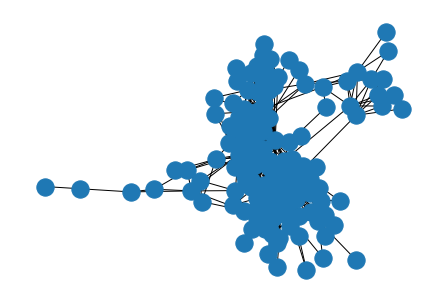

In [79]:
G = nx.read_edgelist(r"C:\Users\Julia\Desktop\Activity 2_Juliana Ramayo\ia-enron-only.edges", nodetype=int)
print(G)
nx.draw(G)

#### Caveat: by default, `nx.read_edgelist` assumes node names are strings
Edge lists are a simple, plain text format for storing graphs. Since this simple file format doesn't contain information about data types, all node names are assumed to be strings by default. When the node names are given by integers, as they are in this example, we should specify the `nodetype=int` keyword argument to avoid confusion with the node names.

#### Aside: the `max` function
We're going to make use of Python's built-in `max` function in order to find the node with the highest degree.

First, let us recall what the `max` function does. At its most basic, the `max` function returns the "greatest" item in a sequence:

In [80]:
max([1,2,3,4,5])

5

But the "greatest" item is not always obvious:

In [81]:
max(['apple', 'grape', 'carrot'])

'grape'

Why is grape greater than the other options? Because the default sort for strings is lexicographical (basically alphabetical) order. If we don't want this default ordering, we can specify a key function, which tells Python how to compare the items:

In [82]:
max(['apple', 'grape', 'carrot'], key=len)

'carrot'

Now `carrot` is the greatest element, because we're comparing the items by their length.

#### Finding the node with max degree
We can apply the `max` function to get the maximum node according to some criterion. In our case, we want to compare the nodes by their degree:

In [83]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

105

In [84]:
G.degree(highest_degree_node)

42

So we know that node `105` has 42 edges connected to it. Let's look at that calculation a little closer:

`max(G.nodes, key=G.degree)`

We're telling the `max` function that we want the item from `G.nodes` that gives us the highest value when passed to the key function `G.degree`.

This construction works because `G.degree` is a function. Some other measures of centrality such as betweenness generate all of the nodes' centrality values at once and return a `dict`. In this case, we need an extra step:

In [85]:
betweenness = nx.centrality.betweenness_centrality(G)
highest_betweenness_node = max(G.nodes, key=betweenness.get)
highest_betweenness_node

105

In [86]:
betweenness[highest_betweenness_node]

0.19400604344556296

Note that the following will throw an error:

In [87]:
max(G.nodes, key=betweenness)

TypeError: 'dict' object is not callable

This is because we need to provide a function to the `key` argument, but `betweenness` is a dict. To get around this, we use the dict's `get` method.

### Centrality Distributions
We've found the most central node in the network, but often we want to summarize information about the centrality of all nodes. For example, in addition to the maxmimum degree, we often want the mean and median degree in a network.

The first step in summarizing this information is to get a sequence of all of the centrality values in the graph. We don't care about the node names anymore, we just want a sequence of numbers. We can start with the example of degree:

In [88]:
degree_sequence = [G.degree(n) for n in G.nodes]

To get the mean and median of this sequence, we can use Python's built-in `statistics` module:

In [89]:
import statistics

print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 8.713286713286713
Median degree: 8


For other measures of centrality, which are calculated for the whole network at once and return a dict, we can use the dict's `.values()`.

In [90]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.013950388838012454
Median betweenness: 0.0037492834763570323


#### Plotting the Distributions
We can graphically represent the sequence of centrality values by using a *histogram*. In its basic form, a histogram plots the degree values on the x-axis, and the number of nodes having that degree on the y-axis. To do this counting, we can make use of Python's `collections.Counter`.

In [91]:
from collections import Counter

degree_counts = Counter(degree_sequence)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

The `Counter` object returned is like a dict, pairing the item counted with the number of times it showed up in the sequence.

On this basic histogram plot, we want an x-value for every integer between the minimum and maximum degree in the sequence, inclusive. Note that `degree_counts.keys()` gives us every distinct value seen in the degree sequence. Also note that we need the +1 in the `range` below because we want to include the right endpoint.

In [92]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))

Our y-values are then the number of times we counted each x-value in the degree sequence. We can make use of the .get method with a default value in order to count 0 for degree values that don't show up in the sequence. For example, notice that 32 does not show up in `degree_counts` above, so `degree_counts.get(32, 0)` will give us 0.

In [93]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

To do the plotting, we use Matplotlib's `pyplot` module.

<BarContainer object of 42 artists>

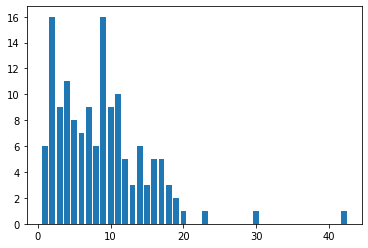

In [94]:
import matplotlib.pyplot as plt

plt.bar(plot_x, plot_y)

#### Histogram Binning
When there are more x-values than you can comfortably display, or when your centrality measure is not discrete, as in the case of betweenness centrality, we can make use of histogram "binning." This just defines a sequence of disjoint intervals called bins, and counts the number of values that fall into each such bin. In the simplest of cases, we can just tell Pyplot's `hist` function how many bins we want and it will do the binning for us.

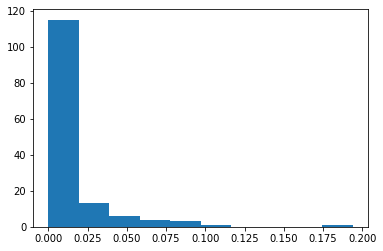

In [95]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)

We can investigate the returned `bins` and `counts` if we want:

In [96]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [97]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

From these, we can see that there are 115 values between 0 and 0.0194006, 13 values between 0.194006 and 0.3880121, etc.

### Testing Robustness
Another way to think about the relative "importance" of nodes in a network is to measure how much it would damage the network structure if particular nodes were to be removed. In real life, node removal might be a person moving away and out of a social network, someone changing jobs and being removed from an email network, internet routers being attacked/overloaded and going down, etc.

Broadly, we consider two types of network damage: random failure and targeted attack. In a random failure, nodes are chosen randomly for removal. In a targeted attack, we will remove nodes based on some criterion, for example, removing nodes in decreasing order of their degree centrality.

#### Connected Components
In order to measure "damage," we will measure the size of the network's largest connected component, sometimes called core. First we observe that `nx.connected_components` is a generator that provides the connected components one at a time.

In [98]:
nx.connected_components(G)

<generator object connected_components at 0x0000018CD619F6F0>

Since we often only want the core, or largest connected component, we can use the max function to get it. Each component is provided as a set of node names:

In [99]:
core = max(nx.connected_components(G), key=len)
core

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143}

So the `len` of this set gives us the number of nodes in this component:

In [100]:
len(core)

143

If we want all of the connected components, we can get a list of them:

In [101]:
components = list(nx.connected_components(G))

the length of this list is the number of connected components:

In [102]:
len(components)

1

#### Fandom Failure
Whenever we're going to engage in a distructive process, we want to make a copy of the network graph to attack so that we can easily get back to the original state:

In [103]:
C = G.copy()

To simulate random failure, we randomly choose some node names and remove them from the graph. We can use `random.sample` to remove more than one node at at time. Note that we need to make a `list` of node names from which to randomly sample:

In [104]:
import random

nodes_to_remove = random.sample(list(C.nodes), 2)
C.remove_nodes_from(nodes_to_remove)

The full simulation is going to work like this, beginning from a fresh copy of the network:

1. Measure size of the network core as compared to the original network size
2. Select M nodes at random and remove them
3. Repeat until there are less than M nodes

We'll determine M from how many steps we want this process to take. Around 25 steps should be good, so:

In [105]:
number_of_steps = 25
M = G.number_of_nodes() // number_of_steps
M

5

We can then use `range` to generate a sequence of the total number of nodes removed at each step:

In [106]:
num_nodes_removed = range(0, G.number_of_nodes(), M)

The loop is fairly simple. At each step, we need to record the fraction of remaining nodes in the core.

In [107]:
N = G.number_of_nodes()
C = G.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = max(nx.connected_components(C), key=len)
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)

    # If there are more than M nodes, select M nodes at random and remove them
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)

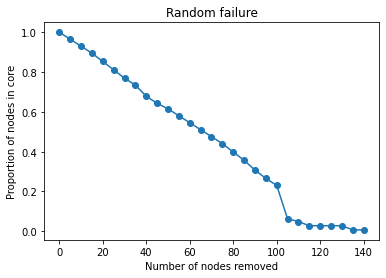

In [108]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

#### Targeted Attack
Simulating a targeted attack is similar, except that instead of choosing randomly, we will select the M most central nodes at each step. To accomplish this we want something like the `max` function used earler to get the most central node, but able to get the top M nodes. We can use Python's `sorted` function in a similar way to `max` to first sort the nodes by centrality in descending, or reverse, order. Once sorted by degree, we take the first M nodes in the list:

In [109]:
nodes_sorted_by_degree = sorted(G.nodes, key=G.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

[105, 17, 95, 48, 132]

With that in mind, the loop looks similar. Let's put all the pieces together here:

In [110]:
N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed = range(0, N, M)
C = G.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = max(nx.connected_components(C), key=len)
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)

    # If there are more than M nodes, select top M nodes and remove them
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

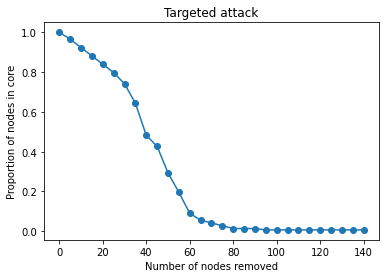

In [111]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='o')

As we can see, the effect is dramatic. The network is totally disconnected after removing relatively few central nodes in the graph.

Pyplot can plot these curves on the same plot for additional effect:

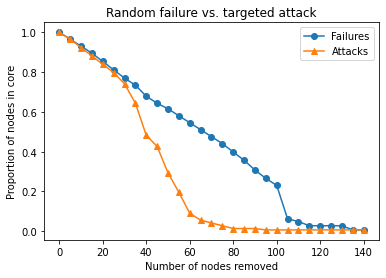

In [112]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o', label='Failures')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='^', label='Attacks')
plt.legend()

## Chapter 6
### Partitions
A **partition** of a graph is a separation of its nodes into disjoint groups. Consider the following graph:

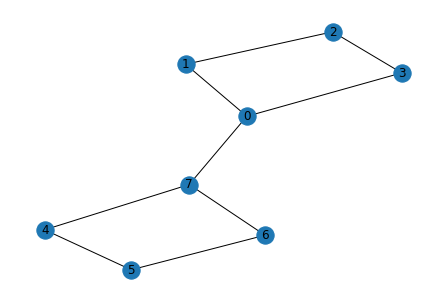

In [113]:
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

nx.draw(G, with_labels=True)

The following is an example of a partition of these nodes:

In [114]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

Observe that every node in the graph is in exactly one of the sets in the partition. Formally, a partition is a list of sets such that every node is in exactly one set. NetworkX can verify that our partition is valid:

In [115]:
nx.community.is_partition(G, partition)

True

When developing community detection algorithms, we often make use of a partition map, which is a dictionary mapping node names to a partition index. This is useful for quickly comparing if two nodes are in the same cluster in the partition:

In [116]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In this dictionary, the keys are the node names and two nodes will have the same value if they are in the same partition:

In [117]:
partition_map[0] == partition_map[7]

True

We can visualize our partition by drawing the graph with nodes colored by their partition membership:

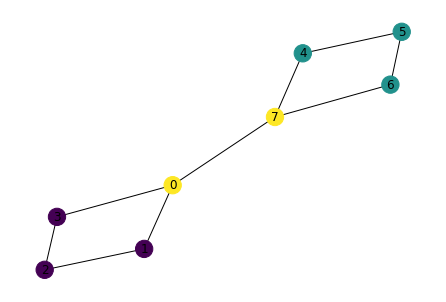

In [118]:
node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

There are two trivial partitions:

1. The partition with one set containing every node;
2. The partition with N sets, each containing a single node.

A valid partition thus contains between 1 and N sets.

Feel free to experiment by changing the partition above and running the subsequent cells.

### Modularity
At a high level, network community detection consists of finding a partition that achieves good separation between the groups of nodes. Before we get into how to find good partitions of a graph, we need an objective -- a way to measure how good the partition is. Modularity is one such objective function.

The modularity of a graph partition compares the number of intra-group edges with a random baseline. Higher modularity scores correspond to a higher proportion of intra-group edges, therefore fewer inter-group edges and better separation of groups.

For weighted undirected networks, as described in the text, we have
\( Q_w = \frac{1}{W} \sum_{C} \left( W_C - \frac{s_C^2}{4W} \right) \),

where

- \( W \) is the total weight of the links of the network,
- \( W_C \) the total weight of the internal links of cluster \( C \), and
- \( s_C \) the total strength of the nodes of \( C \).

The total weight $W$ is half the total strength for the same reason that the number of edges $L$ is half the total degree. While this formula may look a bit complicated, it's straightforward to write code to compute the sum:

In [119]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [120]:
modularity(G, partition)

0.2222222222222222

Let's compare this to a partition we would suspect to have higher modularity:

In [121]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

0.3888888888888889

#### NetworkX Function
NetworkX provides a modularity function that is more efficient than ours:

In [122]:
nx.community.quality.modularity(G, partition_2)

0.38888888888888884

### Zachary's Karate Club
When writing and testing community-detection algorithms, it helps to make use of benchmark networks: graphs with a known, "natural" community structure. Perhaps the most famous benchmark graph is Zachary's Karate Club. It contains 34 nodes, representing members of a karate club whose interactions were monitored over a period of three years by researchers. Links in this graph connect individuals interacting outside club activities, a proxy for social ties.

During the course of the study, a conflict between the instructor Mr. Hi (node 0) and the president, or Officer (node 33) led to a split of the club into separate groups led by Mr. Hi and Officer. In this case we know whom each member of the group followed after the split, providing empirical community labels: those members who followed Mr. Hi are said to be one community and those following the Officer make up the other.

For this graph, we assume that the post-split group composition was largely driven by the social ties: members of the same friend groups would want to be part of the same club after the split. We thus expect a good community-detection algorithm to predict the post-split group composition with high accuracy.

Zachary's karate club is such a popular benchmark graph that it has its own function in NetworkX:

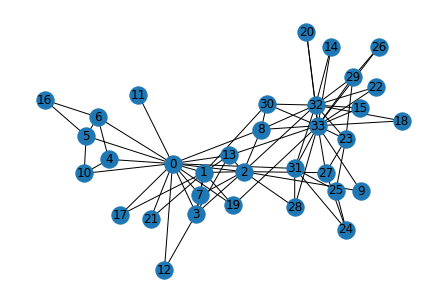

In [123]:
K = nx.karate_club_graph()
nx.draw(K, with_labels=True)

Each node in a NetworkX graph has a dictionary of *attributes* associated with it. This dictionary can hold arbitrary data about a node. We can get the attributes for a single node by giving the node name to the `nodes` object.

Each node in this graph has a `'club'` attribute, indicating whether the member followed the instructor or the president after the split:

In [124]:
K.nodes[0]

{'club': 'Mr. Hi'}

In [125]:
K.nodes[9]

{'club': 'Officer'}

We can visualize these labels by coloring each node according to its `'club'` attribute:

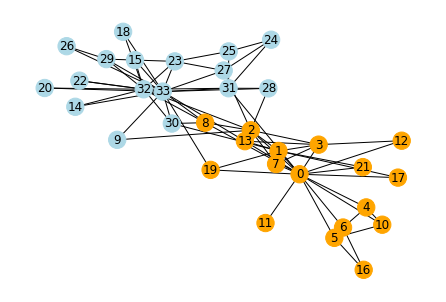

In [126]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)

This separation looks good, in that there are relatively few inter-community links as opposed to intra-community links. Let's create a graph partition based on these labels and measure its modularity.

We can do this by creating a dictionary of two sets, one for each value of the nodes' `'club'` attribute, then assigning the nodes to the corresponding set.

In [127]:
groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in K.nodes:
    club = K.nodes[n]['club']
    groups[club].add(n)
    
groups

{'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 'Officer': {9,
  14,
  15,
  18,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}}

By using the dictionary's `.values()` method, we can get a list of sets that define our partition:

In [128]:
empirical_partition = list(groups.values())
empirical_partition

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 {9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [129]:
nx.community.is_partition(K, empirical_partition)

True

Since our partition is indeed a valid partition, we can get the modularity of this partition:

In [130]:
nx.community.quality.modularity(K, empirical_partition)

0.39143756676224206

This is a relatively high modularity, which is what we expect.

#### Comparison to a Random Partition
For the sake of comparison, let's generate a random partition of this network and check its modularity. We would expect a modularity close to zero in this case.

First we generate a sample of 17 nodes, half the total number of nodes, and assign them to one community. Our second community then includes the nodes in the graph not in the first community. We can use some set arithmetic to do this concisely:

In [132]:
random_nodes = random.sample(list(K.nodes), 17)
random_partition = [set(random_nodes),
                    set(K.nodes) - set(random_nodes)]
random_partition

[{1, 4, 5, 6, 9, 10, 11, 13, 15, 18, 19, 22, 24, 25, 28, 29, 33},
 {0, 2, 3, 7, 8, 12, 14, 16, 17, 20, 21, 23, 26, 27, 30, 31, 32}]

We can visualize this partition and observe that the communities are much less natural-looking, as we would expect from a random assignment.

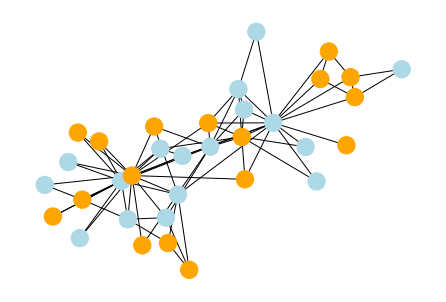

In [133]:
random_node_colors = ['orange' if n in random_nodes else 'lightblue' for n in K.nodes]
nx.draw(K, node_color=random_node_colors)

And finally we can test the modularity of this partition:

In [134]:
nx.community.quality.modularity(K, random_partition)

-0.0311557129738948

Since this is a random process the modularity won't be exactly zero, but it should be fairly close. Go ahead and repeat the process of generating a random partition and testing its modularity -- it will fluctuate around its mean value of zero.

### Girvan-Newman Clustering
Our task in this part will be to implement the Girvan-Newman clustering algorithm. Since NetworkX can do the heavy lifting for us -- computing betweenness centrality -- the code part of the task is relatively straightforward. Most of our effort here is spent interpreting and explaining intermediate results.

Recall from the text the Girvan-Newman clustering algorithm:

1. Create a partition sequence
2. Calculate the betweenness centrality for all links.
3. Remove the link with largest betweenness and create a partition using connected components.
4. Recalculate the betweenness centrality of the links of the resulting graph.
5. Repeat from step B until no links remain.
6. Evaluate each partition in the sequence and choose the one with the highest modularity.

During this process, the number of connected components in the graph will increase monotonically as clusters are broken up. Since we are removing one link at a time, the number of connected components can increase by at most one between steps in the sequence -- it's not possible for a single edge to connect more than two nodes, and thus components.

We hope that the resulting partition of the graph will approximate its underlying community structure. We'll use the Karate Club graph here because we know the ground-truth community labels and can compare the result obtained from the algorithm.

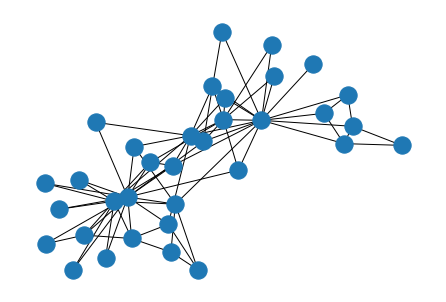

In [135]:
G = nx.karate_club_graph()
nx.draw(G)

#### Create a Partition Sequence
##### Calculate the Betweenness Centrality for All Links
NetworkX does the heavy lifting here. All we need to do is understand the output.

In [136]:
nx.edge_betweenness_centrality(G)

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

The resulting dictionary has edge tuples as the keys, and each associated value is the betweenness centrality of that edge. The algorithm to compute the edge betweenness of all edges in a graph costs about the same as calculating it for a single edge, so we'll make use of this dictionary with the computed values for every edge.

Once computed for all edges, we can easily get the associated betweenness for a single edge. For example, to get the edge betweenness of the edge between nodes 0 and 1:

In [137]:
my_edge_betweenness = nx.edge_betweenness_centrality(G)
my_edge_betweenness[0, 1]

0.025252525252525245

Recall that dictionaries also have the `.get` method. This will be used in the next step.

In [138]:
my_edge_betweenness.get((0, 1))

0.025252525252525245

##### Remove the Link with Largest Betweenness...
Given this dictionary of betweenness values for each edge, we can make use of Python's builtin `max` function to give us the key in this dictionary with the greatest value. Since there is a key in the dictionary for each edge in the graph, the following two expressions are equivalent, but the second one is probably more explicit as to what we're doing with this statement.

I'm using the name `my_edge_betweenness` to make clear that this is a dictionary we've named and not a NetworkX function.

In [139]:
max(my_edge_betweenness, key=my_edge_betweenness.get)

(0, 31)

In [140]:
max(G.edges(), key=my_edge_betweenness.get)

(0, 31)

This is then the edge we want to remove at this step in the process:

In [141]:
my_edge_betweenness = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)

The "splat" in the last statement above `G.remove_edge(*most_valuable_edge)` performs tuple unpacking into the arguments of a function. For example, if our most valuable edge is `(0, 31)`,

`G.remove_edge(*most_valuable_edge)`

is the same as

`G.remove_edge(most_valuable_edge[0], most_valuable_edge[1])`

or

`G.remove_edge(0, 31)`

##### (cont'd) ...and Create a Partition Using Connected Components
This one is almost a gimme because the `nx.connected_components()` function gives us almost exactly what we want:

In [142]:
nx.connected_components(G)

<generator object connected_components at 0x0000018CD5D37920>

We just have to remember to ask for it in a list:

In [143]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

Remember: a partition is a list of sets where every node is in exactly one of these sets. This is just what we have here, although it's a bit boring since we've only removed one edge and so there is still one connected component. If you like, you can try running the previous two cells a few times until you have more than one connected component so you can see what that looks like.

Note that this feature whereby the connected components correspond exactly to our putative community labels is particular to the Girvan-Newman algorithm: other clustering algorithms may use different ways of generating their partitions.

##### Recalculate the Betweenness Centrality of the Links of the Resulting Graph.
##### Repeat from Step B Until No Links Remain.
This implies that we need a loop to repeat this process $L$ times, once for each edge, and that we should keep track of the partitions generated. Straightforward stuff. We'll start with a fresh Karate Club graph since we removed some edges above:

In [144]:
G = nx.karate_club_graph()
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)

Note the idiomatic construction of this `for` loop. Using `_` as the name for the loop variable tells the reader that we don't expect to do anything with the loop variable -- we just want to perform a task a specific number of times. One might be tempted to use a `while` loop here, but that way lie dragons: a mistake in a `while` loop can lead to infinite loops which are a headache.

If we've done this right, we should have a partition for each step of the process, i.e. one for each edge in the graph:

In [145]:
len(partition_sequence), nx.karate_club_graph().number_of_edges()

(78, 78)

Since we started with a connected graph, removing one edge probably doesn't disconnect the graph, so our first partition probably only has one community:

In [146]:
len(partition_sequence[0])

1

...and the last partition should also be trivial, with each node in its own community:

In [147]:
len(partition_sequence[-1]), nx.karate_club_graph().number_of_nodes()

(34, 34)

#### Evaluate the Modularity of Each Partition in the Sequence
We now have a sequence of partitions and a function to calculate the modularity of a partition. This is a great time to use a list comprehension!

In [148]:
G = nx.karate_club_graph()
modularity_sequence = [modularity(G, p) for p in partition_sequence]
modularity_sequence

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34766027623170476,
 0.34766027623170476,
 0.34766027623170476,
 0.3423192968647515,
 0.3423192968647515,
 0.3423192968647515,
 0.3423192968647515,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.38497217068645645,
 0.37578006409175246,
 0.37578006409175246,
 0.3594760218136842,
 0.3594760218136842,
 0.3470699574595679,
 0.3470699574595679,
 0.333249002080171,
 0.333249002080171,
 0.3134405277262421,
 0.3134405277262421,
 0.3122598901819681,
 0.3122598901819681,
 0.3036862127771219,
 0.3036862127771219,
 0.2942973332583722,
 0.2942973332583722,
 0.2827158411573995,
 0.2827158411573995,
 0.27116245947414774,
 0.27116245947414774,
 0.2544648713479881,
 0.2544648713479881,
 0.2397537527407657,
 0.2397537527407657,
 0.22689792170311643,
 0.22299057363992422,
 0.22299057363992422,
 0.22299057363992422,
 0.20056783043796034,
 0.20056783043796034,
 0.1

This sequence is then the modularity of the partition at each step in the algorithm. The first several entries in this sequence are effectively zero while there is only one community/component, then it jumps up once there is more than one community. We can use pyplot to visualize this relationship:

Text(0.5, 0, 'Algorithm step')

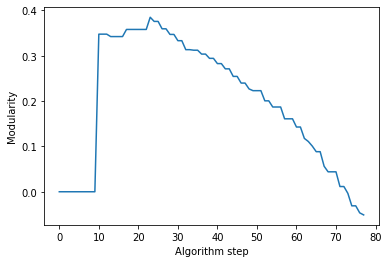

In [149]:
import matplotlib.pyplot as plt
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

#### Get the Partition with Highest Modularity
Visually, we see a peak in the modularity sequence. This is the partition that maximizes modularity, and thus the output of the algorithm. We can use the `max` function to get the partition with highest modularity. Ideally we want to write the following:

In [150]:
best_partition = max(partition_sequence, key=nx.community.quality.modularity)

TypeError: modularity() missing 1 required positional argument: 'communities'

...but we receive an error. Recall that a key function must take exactly one argument, the item in the sequence being evaluated, but the modularity function takes two arguments: the graph and the partition. We can fix this by writing a single-argument function to use as the key:

In [151]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)

Advanced Pythonauts will see a differet solution to this using the `zip` function to align the previously-generated partition & modularity sequences, but this solution is more explicit.

So after all that work, what is the best partition?

In [152]:
best_partition

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9}]

Interesting! The partition of the karate club graph with highest modularity actually has five components! Let's visualize them, using our code for partition maps we wrote back at the beginning of this tutorial:

In [153]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

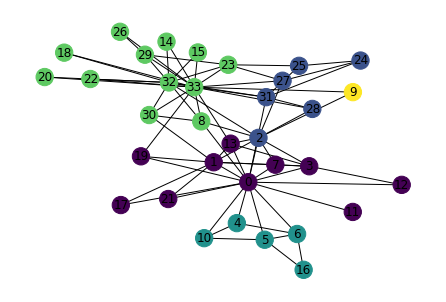

In [154]:
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

Exactly how good is this five-community clustering?

In [155]:
nx.community.quality.modularity(G, best_partition)

0.3849721706864564

It's higher than the "ground truth" communities we evaluated in section 3, which is a good sign, but for the specific problem of trying to predict the post-split community membership, a clustering into five groups is useless to us.

#### Get the Best Partition with a Given Number of Communities
One of the most useful parts of the Girvan-Newman algorithm is that it is also useful when we have a specific number of clusters we want. In this case, we know the karate club split into two groups, so let's get the partition in the sequence with two components:

In [157]:
for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break

two_cluster_partition

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

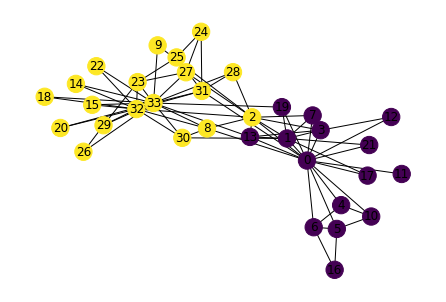

In [158]:
two_cluster_partition_map = create_partition_map(two_cluster_partition)

node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

How good is this partition? We can get its modularity:

In [159]:
nx.community.quality.modularity(G, two_cluster_partition)

0.3476602762317048

Pretty good -- comparable to the ground truth community labels. Let's compare these side-by-side:

Text(0.5, 1.0, 'Actual communities')

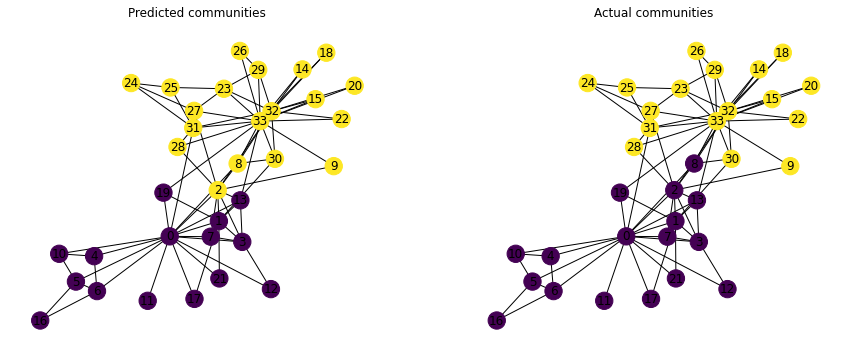

In [160]:
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
two_cluster_partition_map = create_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')

plt.subplot(1, 2, 2)
node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')

We can see that the predicted community labels are pretty accurate, only differing on a couple nodes that, visually, seem like they could plausibly beling to either group. Zachary's original paper even explains the practical considerations of one of these mispredicted nodes: student 8 was very near receiving his black belt from Mr. Hi and thus did not want to leave the group even though several of his friends did.

In [161]:
G.nodes[8]

{'club': 'Mr. Hi'}

##### Aside
The astute reader might note that there may be several two-cluster partitions in the partition sequence we generated. We assert the following to be true:

1. For every integer 1 to N, the number of nodes, there is a partition in the sequence with that number of clusters
2. Every partition in the sequence with the same number of clusters is the same

Proving these is left as an exercise to the reader, but as a consequence of these being true, optimized implementations of Girvan-Newman clustering will only store one partition for each number of clusters. This is how the implementation in NetworkX works, only providing one partition for each number of communities greater than one.

### NetworkX Function
`nx.community.girvan_newman(G)` will generate a sequence containing one partition of each size greater than one. Here we can see the first several are the same as those we generated:

In [162]:
list(nx.community.girvan_newman(G))[:5]

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11})]